In [1]:
from modules.runtime.scenario.scenario_generation.interaction_dataset_scenario_generation import \
    InteractionDatasetScenarioGeneration
from modules.runtime.commons.parameters import ParameterServer
from modules.runtime.viewer.matplotlib_viewer import MPViewer
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

from bark.world.evaluation import EvaluatorGoalReached, EvaluatorCollisionEgoAgent, EvaluatorStepCount, \
    EvaluatorCollisionAgents, EvaluatorDistanceToGoal

In [2]:
# Define the secnario:
param_server = ParameterServer()
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["MapFilename"] = os.path.expanduser('~') +"/PRBAD/BARK/interaction_dataset/DR_DEU_Merging_MT/map/DR_DEU_Merging_MT_v01_shifted.xodr"
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["TrackFilename"] = os.path.expanduser('~') +"/PRBAD/BARK/interaction_dataset/DR_DEU_Merging_MT/tracks/vehicle_tracks_013.csv"
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["TrackIds"] = [63,64,65,66,67,68]
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["StartTs"] = 232000
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["EndTs"] = 259000
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["EgoTrackId"] = 67

In [3]:
# Insert MOBIL Agent
param_server["Scenario"]["Generation"]["InteractionDatasetScenarioGeneration"]["BehaviorModel"] = {"67":"BehaviorMobil"}

In [4]:
sim_step_time = 2
sim_time_steps = 20

In [5]:
# Create the scenario
def create_scenario(params):
    scenario_generation = InteractionDatasetScenarioGeneration(num_scenarios=1, random_seed=0, params=params)
    return scenario_generation.create_single_scenario()

In [6]:
def evaluate_scenario(scenario, visualize=False):
    world_state = scenario.get_world_state()
    ego_id = 67
    world_state.AddEvaluator("collision_agents", EvaluatorCollisionAgents())
    world_state.AddEvaluator("collision", EvaluatorCollisionEgoAgent(ego_id))
    world_state.AddEvaluator("max_steps", EvaluatorStepCount())
    world_state.AddEvaluator("distance_to_goal", EvaluatorDistanceToGoal(ego_id))
    
    last_result = None

    for _ in range(0, sim_time_steps):
        world_state.DoPlanning(sim_step_time)
        if visualize:
            fig = plt.figure(figsize=[10, 10])
            viewer = MPViewer(params=param_server, use_world_bounds=True, axis=fig.gca())
            viewer.drawWorld(world_state, scenario._eval_agent_ids)
        world_state.DoExecution(sim_step_time)

        last_result = world_state.Evaluate()
        if last_result["collision_agents"] or last_result["collision"]:
            return last_result
    return last_result

In [7]:
res = []
for spacing in range(0, 7, 3):
    for _politeness in range(0, 10, 3):
        for headway in range(1, 4):
            politeness = _politeness / 10
            
            print(spacing, politeness, headway)
            
            param_server["BehaviorMobil"]["BehaviorIDMClassic"]["MinimumSpacing"] = spacing
            param_server["BehaviorMobil"]["BehaviorIDMClassic"]["PolitenessFactor"] = politeness
            param_server["BehaviorMobil"]["BehaviorIDMClassic"]["DesiredTimeHeadway"] = headway
            
            scenario = create_scenario(param_server)
            result = evaluate_scenario(scenario)

            res.append(pd.Series({
                "politeness": politeness, 
                "spacing": spacing, 
                "headway": headway, 
                **result
            }))


0 0.0 1


/home/vagrant/.cache/bazel/_bazel_vagrant/abd9caf044b12aaae70bfbbedacb9820/execroot/bark_project/bazel-out/k8-fastbuild/bin/docs/tutorials/run.runfiles/bark_project/modules/runtime/commons/xodr_parser.py:105: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if lane.find("userData"):


0 0.0 2
0 0.0 3
0 0.3 1
0 0.3 2
0 0.3 3
0 0.6 1
0 0.6 2
0 0.6 3
0 0.9 1
0 0.9 2
0 0.9 3
3 0.0 1
3 0.0 2
3 0.0 3
3 0.3 1
3 0.3 2
3 0.3 3
3 0.6 1
3 0.6 2
3 0.6 3
3 0.9 1
3 0.9 2
3 0.9 3
6 0.0 1
6 0.0 2
6 0.0 3
6 0.3 1
6 0.3 2
6 0.3 3
6 0.6 1
6 0.6 2
6 0.6 3
6 0.9 1
6 0.9 2
6 0.9 3


In [8]:
df = pd.DataFrame(data=res)

In [9]:
df

,politeness,spacing,headway,collision,collision_agents,distance_to_goal,max_steps
0,0.0,0,1,True,True,54.736217,10
1,0.0,0,2,False,False,2.239136,20
2,0.0,0,3,True,True,50.090260,13
3,0.3,0,1,True,True,54.736217,10
4,0.3,0,2,False,False,2.239136,20
5,0.3,0,3,True,True,50.090260,13
6,0.6,0,1,True,True,54.736217,10
7,0.6,0,2,False,False,2.239136,20
8,0.6,0,3,True,True,50.090260,13
9,0.9,0,1,True,True,54.736217,10


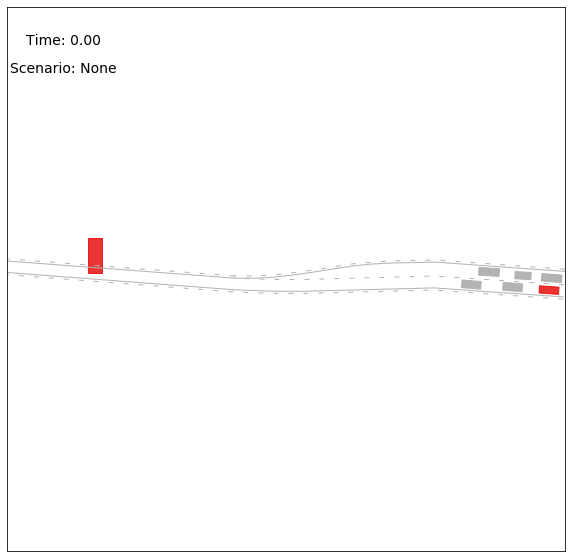

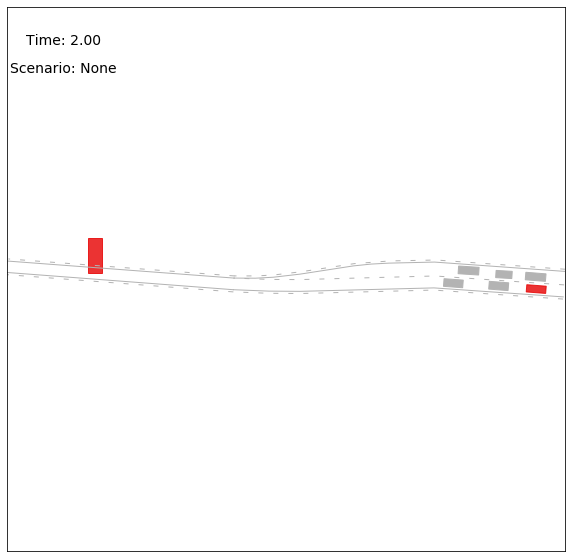

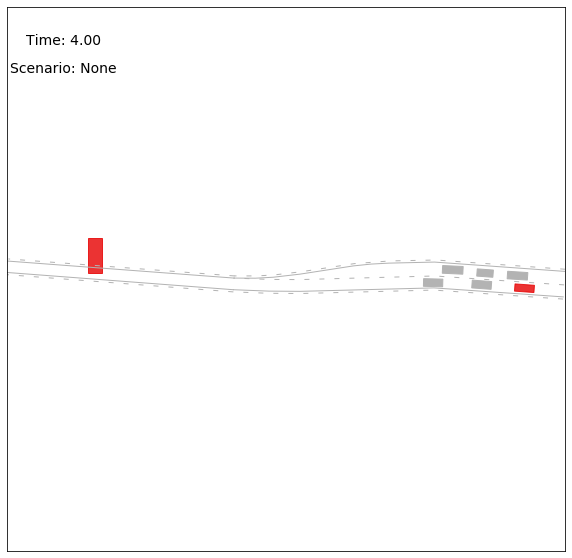

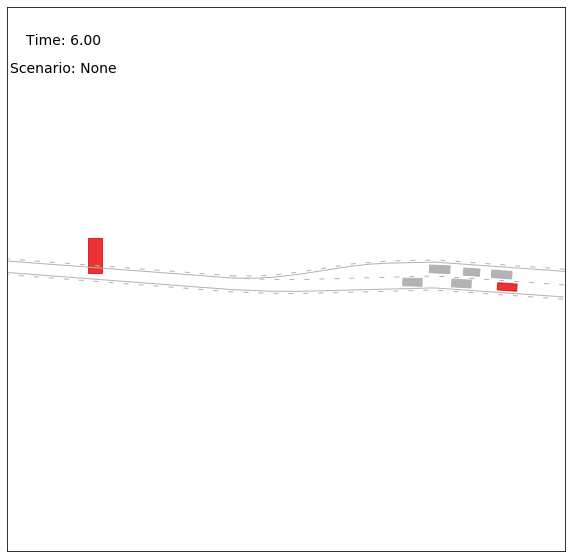

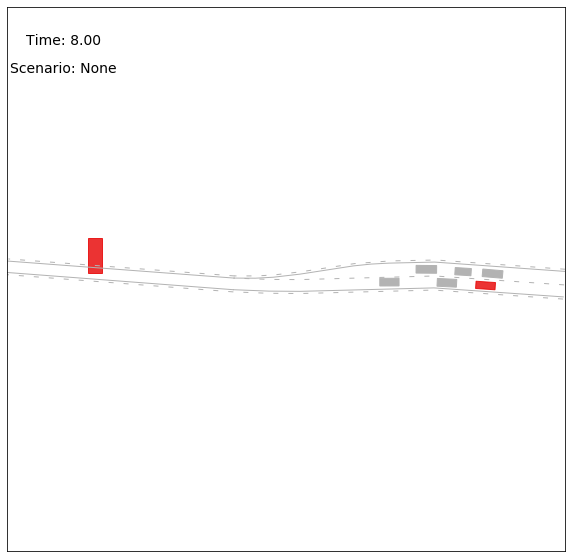

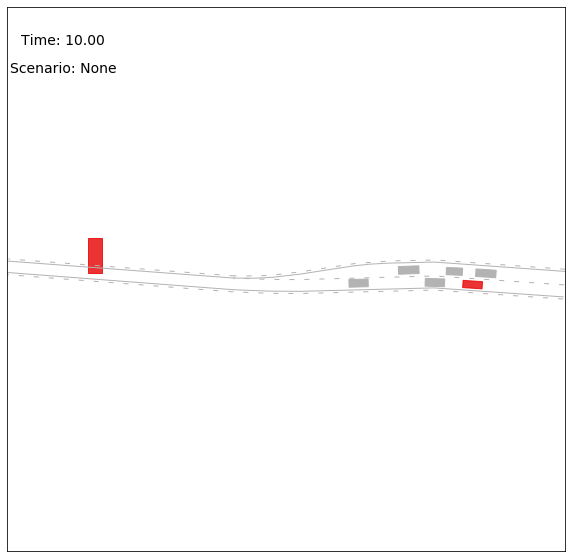

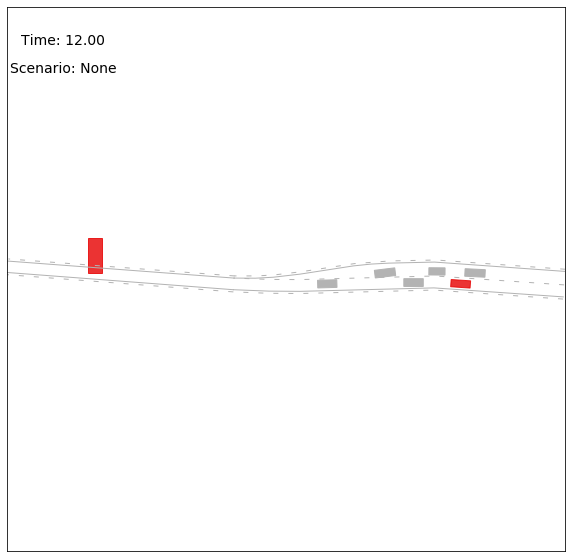

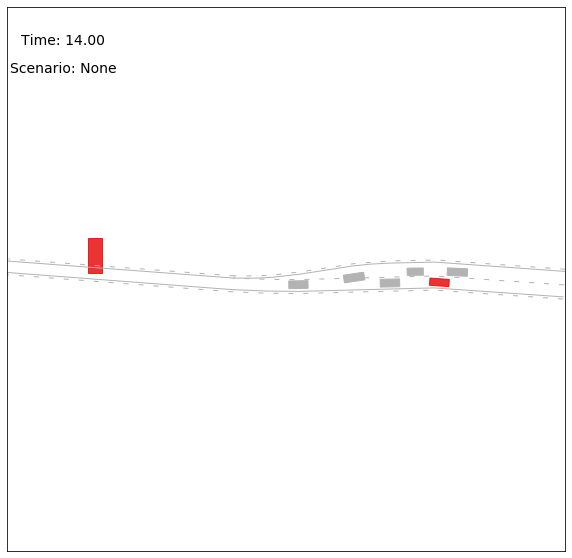

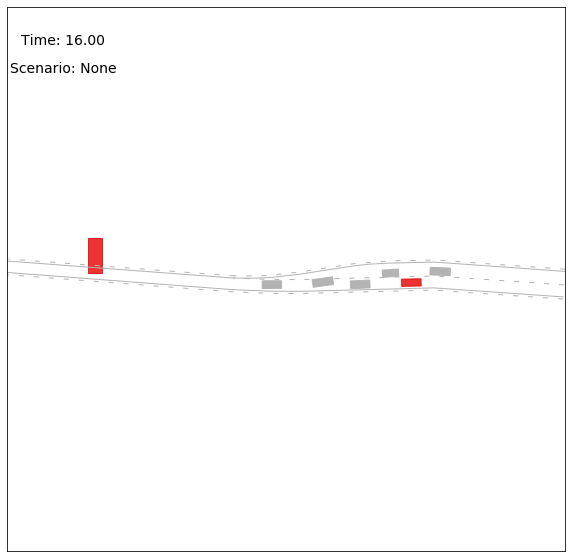

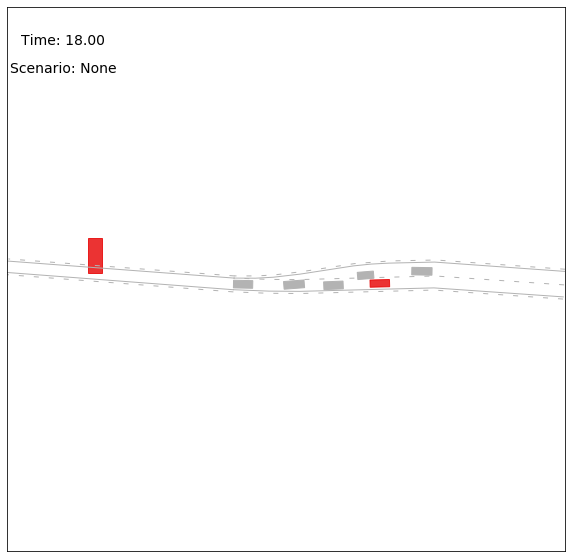

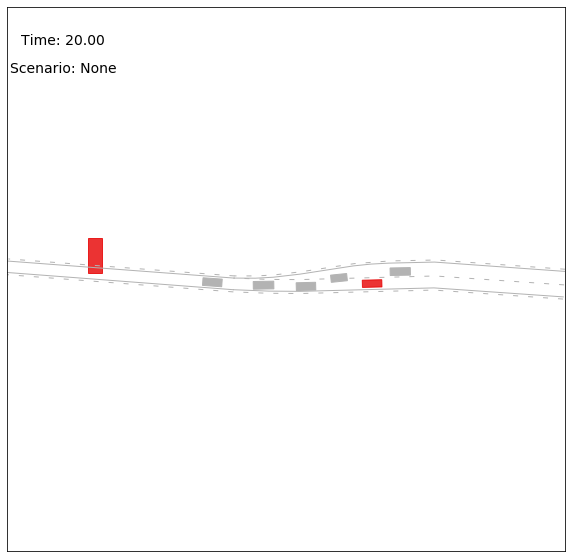

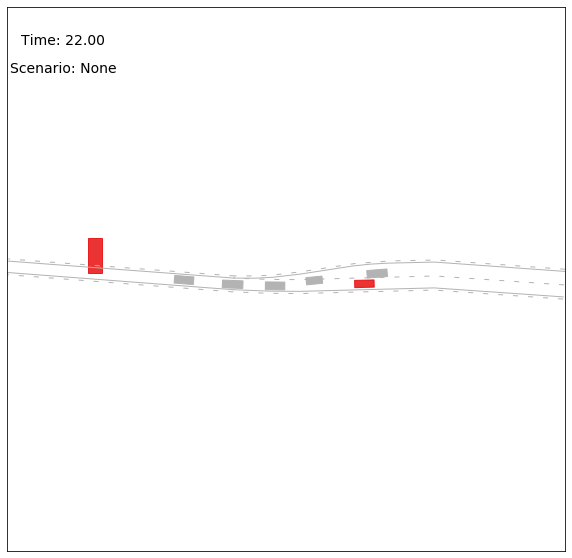

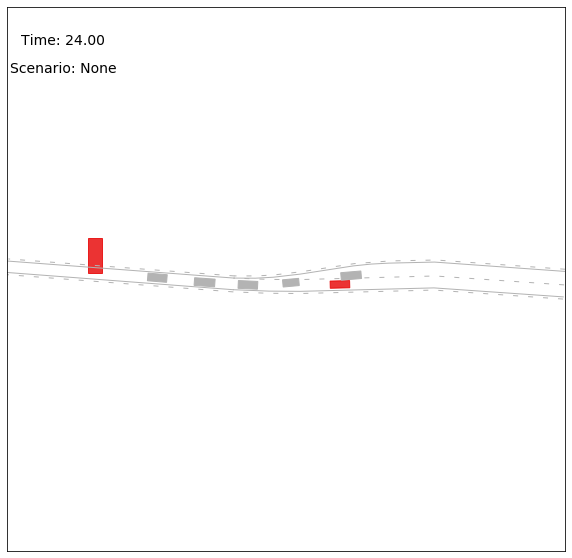

In [10]:
# Visualize what's happening with fixed paramters
param_server["BehaviorMobil"]["BehaviorIDMClassic"]["MinimumSpacing"] = 3.0
param_server["BehaviorMobil"]["BehaviorIDMClassic"]["PolitenessFactor"] = 0.3
param_server["BehaviorMobil"]["BehaviorIDMClassic"]["DesiredTimeHeadway"] = 1
scenario = create_scenario(param_server)
result = evaluate_scenario(scenario, True)

In [11]:
print(json.dumps(param_server.convert_to_dict(), indent=4))

{
    "Scenario": {
        "Generation": {
            "InteractionDatasetScenarioGeneration": {
                "MapFilename": "/home/vagrant/PRBAD/BARK/interaction_dataset/DR_DEU_Merging_MT/map/DR_DEU_Merging_MT_v01_shifted.xodr",
                "TrackFilename": "/home/vagrant/PRBAD/BARK/interaction_dataset/DR_DEU_Merging_MT/tracks/vehicle_tracks_013.csv",
                "TrackIds": [
                    63,
                    64,
                    65,
                    66,
                    67,
                    68
                ],
                "StartTs": 232000,
                "EndTs": 259000,
                "EgoTrackId": 67,
                "BehaviorModel": {
                    "67": "BehaviorMobil"
                }
            }
        }
    },
    "BehaviorMobil": {
        "BehaviorIDMClassic": {
            "MinimumSpacing": 3.0,
            "PolitenessFactor": 0.3,
            "DesiredTimeHeadway": 1,
            "MaxAcceleration": 1.7000000476837158,
  